In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np


In [2]:
            
#task_names = ["mobilenet", "bert", "squeezenet", "shufflenet", "paddle"]
task_names = ["resnet"]
# task_names = ["shufflenet","bert", "squeezenet"]
## "paddle"
            
## set files path
cur_path = os.getcwd()
data_path = cur_path

files_path = {}
for fd in task_names:
    files_path[fd] = []
    files_path[fd].append(os.path.join(data_path, fd+".csv"))
    #files_path[fd].append(os.path.join(data_path, fd, fd+"_scale.csv"))

print(files_path)

# file1 = pd.read_csv(os.path.join(p_spec,files[0]))
# # file1.head(60)

{'resnet': ['/Users/puxuan/PycharmProjects/pythonProject11/resnet.csv']}


In [6]:
#### load data and get p99, p90
def get_http_req_wait(file, time_limit=None):
    #http_wait = file.loc[file.metric_name == "http_req_waiting", ["time","metric_value"] ]
    http_wait = file
    # a limitation
    if time_limit is not None:
        http_wait = http_wait.loc[http_wait["time"] <= time_limit]
    http_wait_fl = http_wait.loc[http_wait["metric_value"] < 10000.0]
    #print(http_wait_fl)
    return http_wait_fl

#def get_percentile(df, p):
#    wait_time_np = df["metric_value"].values
    #pct = np.percentile(wait_time_np, p, axis=0,interpolation="linear")#
#    pct = np.percentile(wait_time_np, p, axis=0,method="linear")
#    return pct

def get_percentile(df, p):
    #if timestamp is not None:
    #    new_df = df.loc[df["timestamp"] <= timestamp]
    #wait_time_np = new_df["metric_value"].values
    wait_time_np = df["metric_value"].values
    #print(wait_time_np)
    pct = np.percentile(wait_time_np, p, axis=0, method="linear")
    return pct

def my_func(file, time_limit, p):
    http_wait = get_http_req_wait(file, time_limit)
    p_va = get_percentile(http_wait, pct)

    return round(p_va.item(0),2)

#percentile = [99, 95, 90, 50]
percentile = [95]
p_dict = {}

new_df = {}

for pct in percentile:
    #pct_noscale = "p"+str(pct)+"_noscale"
    pct_scale = "p"+str(pct)+"_scale"
    #p_dict[pct_noscale] = []
    p_dict[pct_scale] = []
    for task in task_names:

        task_csv = pd.read_csv(files_path[task][0])
        
        http_wait = task_csv.loc[task_csv.metric_name == "http_req_waiting", ["metric_value","timestamp"]]
        
        #print(http_wait)
        
        #http_wait = http_wait.sort_values('timestamp')
        
        http_wait = http_wait.sort_values('timestamp').reset_index(drop=True)
        
        #print(http_wait)
        
        http_wait['timestamp'] = pd.to_datetime(task_csv['timestamp'])

        
        http_wait['time'] = (http_wait['timestamp'] - http_wait['timestamp'][0]).dt.total_seconds()
        
        #print(http_wait)

        # assuming http_wait is the original dataframe with 'time' column
        min_time = http_wait['time'].min()
        max_time = http_wait['time'].max()
        num_samples = 100  # adjust the number of samples as needed

        time_array = np.linspace(min_time, max_time, num=num_samples)
        new_df = pd.DataFrame({'time': time_array,
                               'value': pd.Series(time_array).apply(lambda x: my_func(http_wait, x, pct))})

        #new_df = pd.DataFrame({'time': http_wait['time'],
        #                       'value': http_wait['time'].apply(lambda x: my_func(http_wait, x))})

        #time_range = range(int(task_csv['time'].min()), int(task_csv['time'].max() +  1))
        
        #print(task_csv['time'])

        #for sec in time_range:
        #    http_wait = get_http_req_wait(task_csv, time_limit=sec)
        #    print(http_wait)
        #    p_va = get_percentile(http_wait, pct)
            #if i == 0:
                #p_dict[pct_noscale].append(round(p_va.item(0),2))
                #continue
            #elif i == 1:

        #    p_dict[pct_scale][sec].append(round(p_va.item(0),2))
            
print(new_df)
#print(p_dict["p99_noscale"])
#print(p_dict["p99_scale"])

#print(p_dict["p95_noscale"])
#print(p_dict["p95_scale"])

#print(p_dict["p90_noscale"])
#print(p_dict["p90_scale"])

#print(p_dict["p50_noscale"])
#print(p_dict["p50_scale"])
        
    




            time  value
0   0.000000e+00  55.39
1   2.929293e-10  55.39
2   5.858586e-10  55.39
3   8.787879e-10  55.39
4   1.171717e-09  53.16
..           ...    ...
95  2.782828e-08  57.09
96  2.812121e-08  56.46
97  2.841414e-08  56.46
98  2.870707e-08  56.46
99  2.900000e-08  56.16

[100 rows x 2 columns]


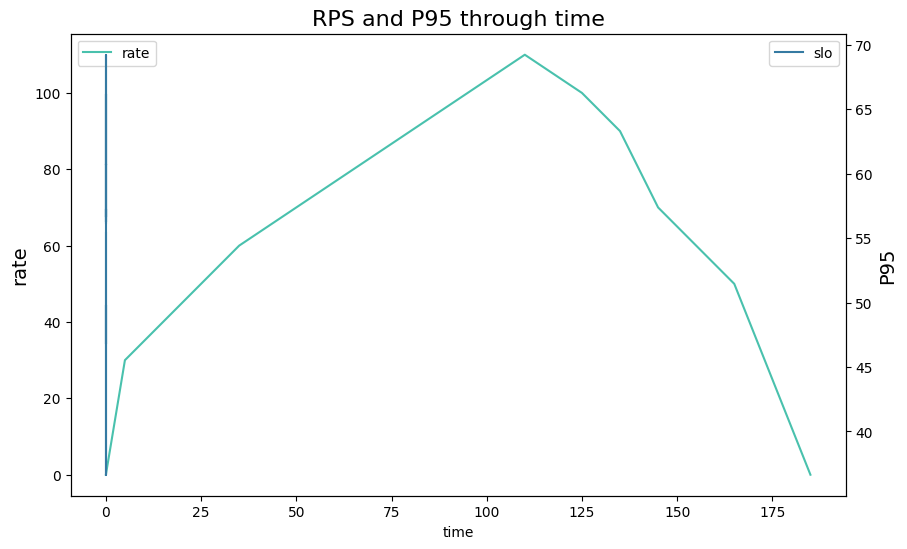

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取csv文件
df = pd.read_csv('rps.csv')

#print(df)

palette = sns.color_palette("mako_r", 3)

#df.head()
# 将时间字符串转为秒数
df['time'] = pd.to_timedelta(df['time']).dt.total_seconds()

# 创建画布和坐标轴对象
fig, ax1 = plt.subplots(figsize=(10, 6))


# 绘制第一个y轴（左边）
sns.lineplot(x='time', y='rate', data=df, ax=ax1, color=palette[0])
ax1.set_ylabel('rate', fontsize=14)

# 设置x轴刻度
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

# 创建第二个y轴（右边）
ax2 = ax1.twinx()
sns.lineplot(x='time', y='value', data=new_df, ax=ax2, color=palette[1])
ax2.set_ylabel('P95', fontsize=14)


# 显示图例
ax1.legend(['rate'], loc='upper left')
ax2.legend(['slo'], loc='upper right')


# 绘制折线图
#plt.plot(df['time'], df['rate'])

# 添加标题和x轴标签
plt.title('RPS and P95 through time', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)

# 设置横纵坐标的标签和标题
#plt.xlabel('Time')
#plt.ylabel('Rate')
#plt.title('Rate over Time')

# 显示图像
plt.show()




In [19]:
from pylab import rcParams


In [ ]:
### draw the histogram diagram

def autolabel(rects, ax_tmp):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax_tmp.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 10.0)

xlabels = task_names
x = np.arange(len(xlabels))

plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
fig, ax = plt.subplots(figsize=(16,6))
plt.figure(figsize=(16, 6))
ax.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)
width=0.3
#p1 = ax.bar(x-width, p_dict["p90_noscale"], width=width , capsize=2, ecolor='blue',
#            edgecolor='green', label='KubeShare', color = 'w', hatch = '////' )
p2 = ax.bar(x, p_dict["p90_scale"], width=width , capsize=2, ecolor='blue', 
            edgecolor='green', label='FaaSShare auto-scaling', color = 'w', hatch = '*' )

ax.set_ylabel("Invocation Response Time P90 (ms)", fontsize = 18.0)
ax.set_xlabel("Inference Tasks", fontsize = 18.0)
ax.set_xticks(x-width/2.0)
ax.set_xticklabels(xlabels, fontsize = 16.0)
ax.legend(fontsize = 14.0, loc='upper left')
ax.title.set_size(20)


#autolabel(p1, ax)
autolabel(p2, ax)


fig.tight_layout()
plt.show()
fig.savefig("p90_nopaddle.png", format='png', dpi=500, bbox_inches='tight')





In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
plt.figure(figsize=(16, 6))
ax.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)

width=0.2
shown = ["90", "50"]
p1 = ax.bar(x-1.5*width, p_dict["p"+shown[0]+"_noscale"], width=width , capsize=2, ecolor='blue', 
            edgecolor='green', label='KubeShare (P'+shown[0]+')', color = 'w', hatch = '////' )
p2 = ax.bar(x-0.5*width, p_dict["p"+shown[0]+"_scale"], width=width , capsize=2, ecolor='blue', 
            edgecolor='green', label='FaaSShare auto-scaling (P'+shown[0]+')', color = 'w', hatch = '*' )
p3 = ax.bar(x+0.5*width, p_dict["p"+shown[1]+"_noscale"], width=width , capsize=2, ecolor='blue', 
            edgecolor='blue', label='KubeShare (P'+shown[1]+')', color = 'w', hatch = '////' )
p4 = ax.bar(x+1.5*width, p_dict["p"+shown[1]+"_scale"], width=width , capsize=2, ecolor='blue', 
            edgecolor='blue', label='FaaSShare auto-scaling (P'+shown[1]+')', color = 'w', hatch = '*' )

ax.set_ylabel("Invocation Response Time (ms)", fontsize = 18.0)
ax.set_xlabel("Inference Tasks", fontsize = 18.0)
ax.set_xticks(x)
ax.set_xticklabels(xlabels, fontsize = 16.0)
ax.legend(fontsize = 14.0, loc='upper left')
ax.title.set_size(20)


autolabel(p1, ax) 
autolabel(p2, ax)
autolabel(p3, ax) 
autolabel(p4, ax)


fig.tight_layout()
plt.show()
fig.savefig("p50_p90_nopaddle.png", format='png', dpi=500, bbox_inches='tight')

In [ ]:
xlabels1 = ["paddle"]
x1 = np.arange(len(xlabels1))
fig1, ax1 = plt.subplots(figsize=(7,6))
plt.figure(figsize=(7, 6))
ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax1.set_axisbelow(True)

shown = ["90", "50"]
# print(p_dict["p"+shown[0]+"_noscale"][4:5])

a,b,c,d = p_dict["p"+shown[0]+"_noscale"][4:5], p_dict["p"+shown[0]+"_scale"][4:5], p_dict["p"+shown[1]+"_noscale"][4:5],p_dict["p"+shown[1]+"_scale"][4:5]
# print(a,b,c,d)
w_1 = 0.05
p1_1 = ax1.bar(x1-1.5*w_1, a, width=w_1 ,  ecolor='blue', 
            edgecolor='green', label='KubeShare (P'+shown[0]+')', color = 'w', hatch = '////' )
p2_1 = ax1.bar(x1-0.5*w_1, b, width=w_1 ,  ecolor='blue', 
            edgecolor='green', label='FaaSShare auto-scaling (P'+shown[0]+')', color = 'w', hatch = '*' )
p3_1 = ax1.bar(x1+0.5*w_1, c, width=w_1 , ecolor='blue', 
            edgecolor='blue', label='KubeShare (P'+shown[1]+')', color = 'w', hatch = '////' )
p4_1 = ax1.bar(x1+1.5*w_1, d, width=w_1 ,  ecolor='blue', 
            edgecolor='blue', label='FaaSShare auto-scaling (P'+shown[1]+')', color = 'w', hatch = '*' )

ax1.set_ylabel("Invocation Response Time (ms)", fontsize = 16.0)
ax1.set_xlabel("Inference Tasks", fontsize = 16.0)


ax1.set_xticks(x1)
ax1.set_xticklabels(xlabels1, fontsize = 14.0)
ax1.legend(fontsize = 11.0, loc='upper right')
ax1.title.set_size(20)


autolabel(p1_1, ax1) 
autolabel(p2_1, ax1)
autolabel(p3_1, ax1) 
autolabel(p4_1, ax1)


fig1.tight_layout()
plt.show()
fig1.savefig("p50_p90_paddle.png", format='png', dpi=500, bbox_inches='tight')

In [ ]:
width = 10
labels = ["P90"]
x = np.arange(len(labels))

plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

fig, ax = plt.subplots(figsize=(7,6))
plt.figure(figsize=(7, 6))
ax.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax.set_axisbelow(True)
p1 = ax.bar(x-3*width, a, width=width , capsize=2, ecolor='blue', edgecolor='red', label='AWS', color = 'w', hatch = 'oo' )
p2 = ax.bar(x - 2*width, b, width=width , capsize=2, ecolor='blue', edgecolor='blue', label='GCF', color = 'w', hatch = '////' )
p3 = ax.bar(x-width, c, width=width , capsize=2, ecolor='blue', edgecolor='green', label='HPC-Node-Cluster', color = 'w', hatch = '++' )
p4 = ax.bar(x, d, width=width , capsize=2, ecolor='blue', edgecolor='magenta', label='Private-Cloud-Cluster', color = 'w', hatch = '..' )
p5 = ax.bar(x + width, a, width=width , capsize=2, ecolor='blue', edgecolor='brown', label='Round-Robin', color = 'w', hatch = 'xxx' )
p6 = ax.bar(x + 2*width, b, width=width , capsize=2, ecolor='blue', edgecolor='black', label='WRR-Based-on-Runtime', color = 'w', hatch = '---' )

ax.set_ylabel('Invocations response time (in ms)', fontsize = 17.0)
ax.set_xticks(x-0.1)
ax.set_xticklabels(labels, fontsize = 15.0)
ax.legend(fontsize = 12.0)
ax.title.set_size(20)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 9.0)


autolabel(p1)
autolabel(p2)
autolabel(p3)
autolabel(p4)
autolabel(p5)
autolabel(p6)
fig.tight_layout()

plt.show()
